In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread("Ringed/Unlabeled/B2022-02983 (2).jpg", cv2.IMREAD_GRAYSCALE)

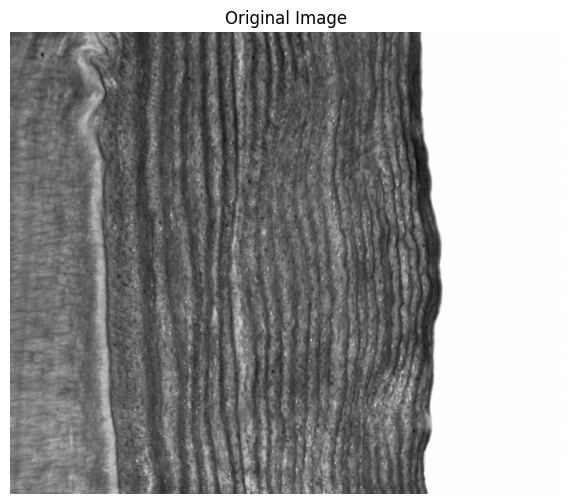

In [6]:
plt.figure(figsize=(8,6))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

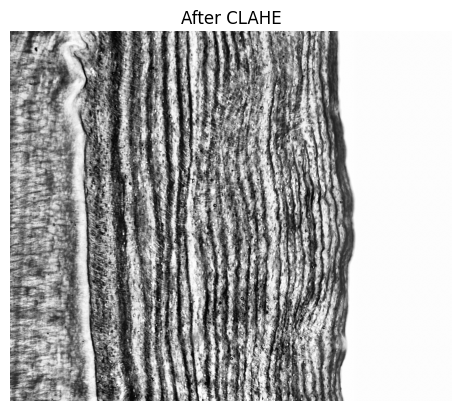

In [7]:
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
enhanced = clahe.apply(img)
blur = cv2.GaussianBlur(enhanced, (0,0), 2)
sharpened = cv2.addWeighted(enhanced, 2.0, blur, -1.0, 0)

plt.imshow(sharpened, cmap='gray')
plt.axis('off')
plt.title('After CLAHE')
plt.show()

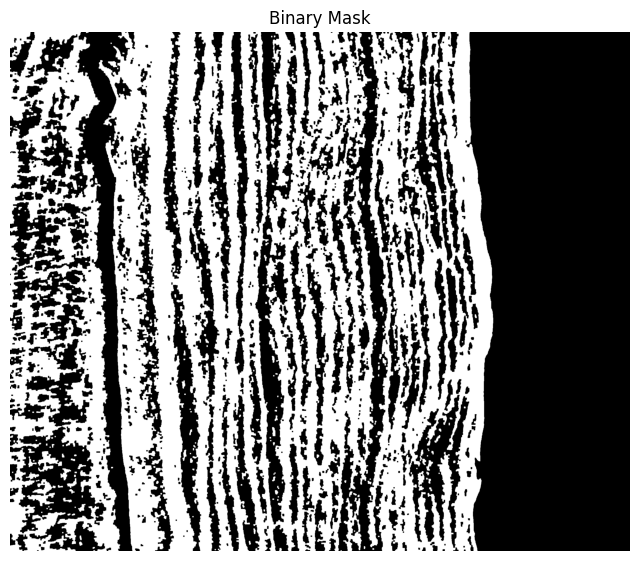

In [ ]:
_, binary = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

binary = cv2.bitwise_not(binary)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel, iterations=2)

plt.figure(figsize=(8,8))
plt.imshow(cleaned, cmap='gray')
plt.title("Binary Mask")
plt.axis('off')
plt.show()

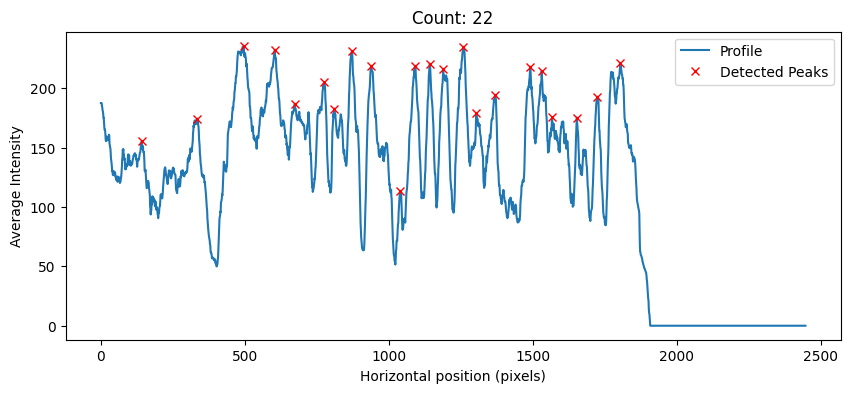

In [9]:
from scipy.signal import find_peaks

mask = np.uint8(cleaned > 127) * 255

profile = np.mean(mask, axis=0)

peaks, _ = find_peaks(profile, distance=20, prominence=30)

plt.figure(figsize=(10,4))
plt.plot(profile, label='Profile')
plt.plot(peaks, profile[peaks], "rx", label='Detected Peaks')
plt.title(f"Count: {len(peaks)}")
plt.xlabel("Horizontal position (pixels)")
plt.ylabel("Average Intensity")
plt.legend()
plt.show()